TODO: we should layout the objectives and questions first so that the students know what they're working towards. And that the end goal is creating a presentation. Otherwise, only I know what they'll be working towards whereas the students are just blindly completing activities with no tangible end result.


TODO:
when making an exercise where the students plot out number of power outages for different counties on a given day, the baseline they are comparing against is either:
a. the number of power outages that county, averaged across several days earlier in June (when the heatwave wasn't happening but it was still summer)
b. the number given in county_customers_2023 - which gives the total (modelled) number of customers in 2023 (its not 2016 but it gives you some idea of what the total might be).

# ORNL: Power Outages and Inequities in Energy Access for medically vulnerable populations

## 1. Welcome!!
 

In June of 2016, a heatwave swept across the SW United States, causing severe loads on the power grid and leading to large number of power outages across several counties. 
We are going to be exploring correlations between temperature and power outages, and identifying how much populations relying on DME were affected in these regions.
This notebook will guide you through the stages of this project, and by the end we will have explored and identified correlations

Some reading resources: 
https://screeningtool.geoplatform.gov/en map of burdened communities 
Articles about the 2016 heatwave:
https://web.archive.org/web/20160622004100/https://weather.com/forecast/regional/news/dangerous-record-heat-southwest-plains
https://www.huffpost.com/entry/record-heat-wildfires-west-us_n_57678bb4e4b015db1bc9be59?section=
medicare at risk population map: https://empowerprogram.hhs.gov/empowermap
FIPS Codes - https://en.wikipedia.org/wiki/List_of_United_States_FIPS_codes_by_county
Useful Jupyter examples for this project - https://github.com/secondspass/jupyter_bootcampproject_examples/
pandas tutorial - https://www.activestate.com/resources/quick-reads/what-is-pandas-in-python-everything-you-need-to-know/
nice visualization of past temperature information - https://www.timeanddate.com/weather/usa/los-angeles/historic?month=6&year=2016

First things first, lets look at our data. We're going to be looking at our data using Excel (or google docs) just so you're familiar with what the data should look like. All the data we need is in this google drive folder: https://drive.google.com/drive/folders/1fAaBPgWWaA_9VB2iYUAWeW8biTXJQFwZ?usp=sharing

We are going to be working with three main datasets:
- 2016_HHSemPOWERMapHistoricalDataset.xlsx - this is the table of the medicare benificiaries population counts and the population counts of those who are dependent on DMEs. The population is listed for each county, and broken down for each month for the year 2016
- temperaturedata/CtyAvTemp6xy16.csv - in the temperaturedata folder, each .csv file is the average temperature of the day for each county in the US and its territories. The numbers in the file name represent the date. For example CtyAvTemp61716.csv is the data for June 17 2016. 
- eaglei_outages/eaglei_outages_2016.csv - This dataset gives the breakdown of the number of customers that were out of power in the year 2016, for each county in the US, with data for each 15 minute increment covering the entire year. 

**NOTE:** Something you'll find as you work with these datasets is that there might be some data missing here and there e.g. There might not be power outage information for some county for some given day. That's just the nature of data science sometimes, that the data you have isn't perfect. So you have to make sure that you're using the data you have and making sure you're accounting for any missing data when before you make any conclusions. 


## 2. Familiarizing yourself with the dataset and generating charts with with Google Sheets

Let's start with just getting familiar with the datasets as they are before we jump into using Python. 

Download the above datasets onto your computer to open it in microsoft excel, or open it in google sheets directly from google drive if you don't have excel on your computer. 

To start with, lets open the CtyAvTemp6202016.csv file in Excel or in Sheets. We are going to try and generate a bar chart of the Average temperature in Farenheit for each county listed in the file. 

Looking at the column names, you'll notice some terms you might not be familiar with. `STATEFP` and `COUNTYFP` represent the 2 digit state part and and the 3 digit county part of the [FIPS Code](https://en.wikipedia.org/wiki/FIPS_county_code). A county or county equivalent in the US is usually given a 5 digit FIPS Code. You'll notice that the `GEOID` column represents the full FIPS Code is a combination of of the `STATEFP` and `COUNTYFP` (note that some `GEOID` values are 4 digits and some are 5 digits. The FIPS Code should be represented as always a 5 digit number, it's just that your spreadsheet decides to remove the zero if its the first digit. But the 5 digits are needed to properly identify a county. We'll be representing the full 5 digits as a string instead of a number later when we get into Python and Pandas). 

Another thing is the `TempK` column representing the average temperature in Kelvin. Lets create a column representing the temperature in Farenheit. The formula to convert Kelvin to Farenheit value is `F = 1.8*(K-273) + 32`. We don't want to manually calculate each Farenheit value, so lets see how to fill an entire column with the corresponding Farenheit value.

Create a a new column `TempF` and enter the below formula in the first cell in the new column and press enter.

```
=(1.8*(I2-273)+32)
```

Where `I2` is the id of the first cell in the `TempK` column.

![screenshot showing TempK column and formula entered in first cell of TempF column](images/sheetsformula.jpg)

Pressing enter will show two things, one is that the formula is replaced by the calculated farenheit value, and two is that google sheets might suggest an autofill to fill out the rest of the column with the same formula to convert K to F for each corresponding value in TempK. (If there is no autofill suggestion, click on the first cell in the TempF column with the formula, and double click the blue circle you see in the bottom left corner of the highlighted cell. This will fill out the formula for the rest of the column).


![screenshot highlighting the blue circle that will autofill the column](images/sheetsformulaexpand.jpg)


Next, lets create a bar chart. Obviously, creating a bar chart for the whole sheet would result in a very big bar chart, so we might want to select down our data to say a few states. For my example, I'm going to select down the data to the specific state FIPS codes 04 (AZ), 32 (NV), and 06 (CA) for my bar chart. You can do this by selcting Data->Filter Views->Create a New Filter View . Then go to the top of the columns and click on the three horizontal lines next to `STATEFP`. In the dropdown menu that opens, click on `Filter by values` and select 4,6,32 (or whichever other states you wanted to examine). 

![screenshot showing filter dropdown menu with state FPs selected](images/sheetsfilterviewselectstates.jpg)


Now creating the bar chart is pretty straightforward. Click on Insert->Chart and in the sidebar that opens select Column Chart from the Chart type dropdown. Then click on X-Axis in the sidebar and select GEOID from the list (if GEOID is not listed as an option then click on the 'Select a data range' button in the dropdown (looks like a square with a cross inside it) and then click on the column id (the alphabet above the GEOID column title) which will fill the range in the 'Select a data range' text box that opens.

![screenshot showing column selection for xaxis, column D (GEOID) is highlighted and the D column range is shown in the Select a data range textbox](images/sheetsbarchartselectrange.jpg)

Do any other customizations to your barchart from the sidebar to your liking. Try playing around with other charts to see if that gives you anything interesting.

### Exercise

Now that your familiar with navigating the data with google docs and making charts, lets try to explore  2016_HHSemPOWERMapHistoricalDataset.xlsx in the same way. When you open the xlsx file in google sheets, you will see it has three sheets 'State', 'County', 'Zip Code' which you can switch between with the tabs at the bottom. 
1. Try to create a bar chart of the DME users for the month of June. If you're using the 'State' sheet, select some states using the filters (or just do all states). If you're using the 'County' sheet, select some counties with the filter. 
2. Are you able to see any variation in population over the months in the year for a given state (or set of states)? Can you generate a chart to visualize that?
3. Are you able to identify which counties in the SW United States had the highest number of DME dependent populations during the time of the June 2016 heatwave? Can you create a chart for that?
4. From exploring the data so far, is there any other perspective you would want to see that you can bring out by drawing charts?


## 3. Getting started with Python and Pandas

Now you've been able to explore what the datasets look like, lets practice using Pandas for analysing data. Before we do anything else, lets make sure all the Python packages we need throughout this whole project are downloaded and installed. Run the below Jupyter code cell to install the packages we will need. `! pip install <package list>` in Jupyter will run the package installer directly from within the Jupyter notebook


In [1]:
!pip install pandas geopandas geodatasets scipy matplotlib openpyxl

Now that we have the python packages installed, lets start familiarizing ourselves with Pandas - how to view the data, how to visualize the data with charts, how to filter the data and so on. TODO: should we write an intro to what Pandas is? Or link to video?
 
### Reading excel files and filtering data with pandas


Importing data from excel into a pandas DataFrame is easy and can be accomplished using the read_excel() function. A pandas DataFrame data structure can be thought of as an excel spreadsheet in python and is laid out similarly with labeled rows and columns of data (the difference being the way it is stored under the hood using multidimensional arrays that allow it to be accessed and used easier in a programmatical fashion). Lets play around with Pandas with an example excel file 2020-movie-data.xlsx (you can download it from the google drive and place it in the data directory).



In [2]:
# import the pandas package under the alias pd
import pandas as pd

# create a variable to hold the excel file name (optional - can also put the filename directly into the read_excel() function) 
excel_file = 'data/2020-movie-data.xlsx' # make sure this file is downloaded and placed in the data folder
# create a variable to hold the pandas DataFrame object
movie_df = pd.read_excel(excel_file)

# prints the DataFrame to the screen
movie_df

,STUDIO,DATE,MOVIE,BUDGET,BOX OFFICE,MULTIPLIER,TYPE
0,SONY,2020-01-03,The Grudge,10000000,49400000,4.94,Franchise
1,FOX,2020-01-10,Underwater,65000000,39200000,0.60,Original
2,PARAMOUNT,2020-01-10,Like A Boss,29000000,26100000,0.90,Original
3,SONY,2020-01-17,Bad Boys for Life,90000000,417600000,4.64,Sequel
4,UNIVERSAL,2020-01-17,Dolittle,175000000,223300000,1.28,Reboot
5,UNIVERSAL,2020-01-24,The Turning,14000000,18500000,1.32,Novel
6,PARAMOUNT,2020-01-31,The Rhythm Section,50000000,5900000,0.12,Novel
7,WARNER,2020-02-07,Birds of Prey,84500000,197900000,2.34,Franchise
8,FOX,2020-02-14,Downhill (Searchlight),15000000,8800000,0.59,Original
9,PARAMOUNT,2020-02-14,Sonic the Hedgehog,85000000,299600000,3.52,IP


If we want to filter the data, pandas provides the `loc` method. The basic functionality of loc is to select specific row or specific columns or specific cells. Go through this tutorial https://www.geeksforgeeks.org/python-pandas-dataframe-loc/# and mess around with selecting rows/columns for the `movie_df`. 

### Exercise
Lets practice in the below two cells what you learned from the tutorial linked above

In [3]:

# select the range of rows from 1 to 7
#movie_df.loc[] # fill in the []

In [4]:
# select just the MOVIE and BUDGET columns
#movie_df.loc[] # fill in the []

### Filtering Data (continued)

`loc` can also let you filter data according to a condition. Say for example you want to select data with a budget > $15,000,000 . You can specify the `loc` like so

In [5]:
movie_df.loc[movie_df["BUDGET"]>15000000]

,STUDIO,DATE,MOVIE,BUDGET,BOX OFFICE,MULTIPLIER,TYPE
1,FOX,2020-01-10,Underwater,65000000,39200000,0.60,Original
2,PARAMOUNT,2020-01-10,Like A Boss,29000000,26100000,0.90,Original
3,SONY,2020-01-17,Bad Boys for Life,90000000,417600000,4.64,Sequel
4,UNIVERSAL,2020-01-17,Dolittle,175000000,223300000,1.28,Reboot
6,PARAMOUNT,2020-01-31,The Rhythm Section,50000000,5900000,0.12,Novel
7,WARNER,2020-02-07,Birds of Prey,84500000,197900000,2.34,Franchise
9,PARAMOUNT,2020-02-14,Sonic the Hedgehog,85000000,299600000,3.52,IP
11,UNIVERSAL,2020-02-14,The Photograph,16000000,20700000,1.29,Original
12,FOX,2020-02-21,The Call of the Wild,135000000,107300000,0.79,Novel
14,DISNEY,2020-03-06,Onward,175000000,101700000,0.58,Original


### Exercise
try filtering based on other conditions and get a feel for using the `loc` function. Use the below cell

In [6]:
# mess around with loc
#movies_df.loc[]

### Plotting data with Pandas and matplotlib 
Pandas also provides a 'plot' method where you can specify the x and y axis from the columns in your dataframe, and specify the kind of plot you want. 

The documentation for Pandas plot is here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

<Axes: xlabel='MOVIE'>

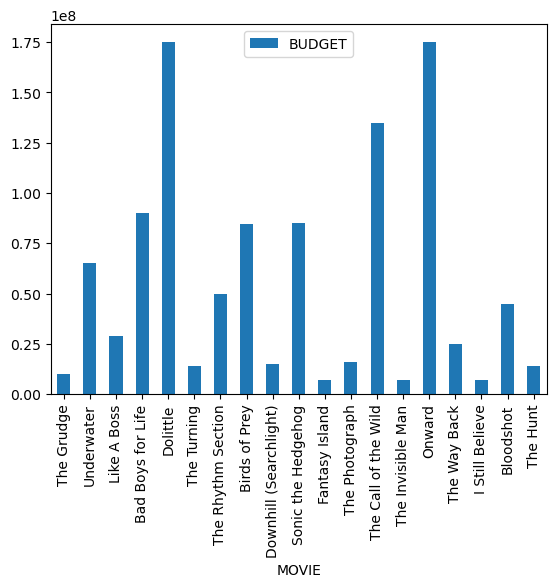

In [7]:
movie_df.plot(x='MOVIE', y='BUDGET', kind="bar")

Pandas plot uses the `matplotlib` python package underneath to generate these plots. Matplotlib is a very powerful package for plotting data with a ton more options and customization than what pandas plot() provides. For example, see below: 

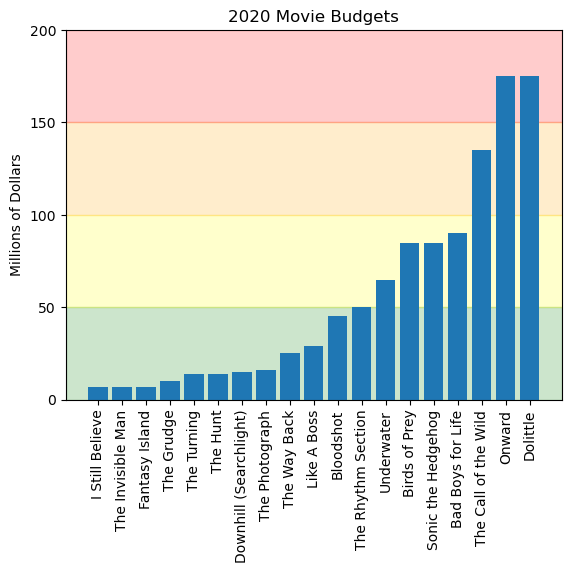

In [8]:
# impot the pyplot package from matplotlib as plt
from matplotlib import pyplot as plt

# create a new DataFrame that is sorted by the BUDGET column
df_sorted = movie_df.sort_values(by='BUDGET')
# format the y axis to use millions of dollars
plt.yticks([0, 50000000, 100000000, 150000000, 200000000], ['0', '50', '100', '150', '200']);
# add y label for millions of dollars
plt.ylabel('Millions of Dollars');
# add a title to the top of the graph
plt.title('2020 Movie Budgets');
# rotate x axis labels 90 degrees
plt.xticks(rotation=90);
# add color ranges for the y-axis values (here green is the smallest budget range, red is the largest budget range)
plt.axhspan(0, 50000000, color='green', alpha=0.2);
plt.axhspan(50000000, 100000000, color='yellow', alpha=0.2);
plt.axhspan(100000000, 150000000, color='orange', alpha=0.2);
plt.axhspan(150000000, 200000000, color='red', alpha=0.2);
# make max y value 200 million
plt.ylim(0, 200000000)
# plot the sorted DataFrame with matplotlib
plt.bar(df_sorted['MOVIE'], df_sorted['BUDGET'], alpha=1);

The fact that matplotlib is so customizable is useful in a lot of situations and its good to keep in your backpocket. But for the most part, we'll be using the Pandas plot() method in this project. And later we'll be using the Geopandas package which is very useful for generating visualizations with maps. 

Now lets practice loading up our actual datasets and generating plots. Similar to how we used `pd.read_excel` to load an excel file, we can use `pd.read_csv` can be used to load a csv file.

In [9]:
df = pd.read_csv("data/CtyAvTemp62016.csv", delimiter=',', skiprows=0, low_memory=False)

df

,OBJECTID_1,STATEFP,COUNTYFP,GEOID,NAME,Lat,Lon,Date_,TempK
0,1,2,185,2185,North Slope,69.449343,-153.472830,6/20/2016 0:00,278.599976
1,2,2,188,2188,Northwest Arctic,67.005066,-160.021086,6/20/2016 0:00,281.899994
2,3,2,290,2290,Yukon-Koyukuk,65.375727,-151.577850,6/20/2016 0:00,283.600006
3,4,2,180,2180,Nome,64.783686,-164.188912,6/20/2016 0:00,279.375000
4,5,2,90,2090,Fairbanks North Star,64.676044,-146.548159,6/20/2016 0:00,283.224976
...,...,...,...,...,...,...,...,...,...
3228,3229,60,40,60040,Swains Island,-11.054436,-171.069014,6/20/2016 0:00,300.750000
3229,3230,60,10,60010,Eastern,-14.268114,-170.625706,6/20/2016 0:00,300.024994
3230,3231,60,50,60050,Western,-14.335468,-170.784233,6/20/2016 0:00,300.024994
3231,3232,60,20,60020,Manu'a,-14.219801,-169.507697,6/20/2016 0:00,299.899994


You'll notice the table isn't displayed fully. That's normal, Jupyter truncates what is visible to save screen space. Rest assured the full data is present. 

### Exercise
1. Can you figure out how to add another column to show temperature in Farenheit?
2. Learning what you have learned about filtering data and plotting with pandas, can you create the same charts here that you created with google sheets?
Use the below cell (or use as many cells as you'd like!). You can create more cells below by clicking on Insert->Insert Cell Below (or Insert Cell Above) which will insert a cell below or above the currently selected cell. 



### Merging dataframes

Something useful you can do with pandas dataframes is that you can merge two of them together based on the columns. Say for example you have loaded the following two datasets as data frames

In [10]:
# specifying sheet_name since there are three sheets in the 2016_HHSemPOWERMapHistoricalDataset.xlsx file
df1 = pd.read_excel("data/2016_HHSemPOWERMapHistoricalDataset.xlsx", sheet_name="County") 
df1

,FIPS_Code,County_FIPS_Code,County,State_FIPS_Code,State,Jan_2016_Medicare_Benes,Jan_2016_Power_Dependent_Devices_DME,Feb_2016_Medicare_Benes,Feb_2016_Power_Dependent_Devices_DME,Mar_2016_Medicare_Benes,...,Aug_2016_Medicare_Benes,Aug_2016_Power_Dependent_Devices_DME,Sep_2016_Medicare_Benes,Sep_2016_Power_Dependent_Devices_DME,Oct_2016_Medicare_Benes,Oct_2016_Power_Dependent_Devices_DME,Nov_2016_Medicare_Benes,Nov_2016_Power_Dependent_Devices_DME,Dec_2016_Medicare_Benes,Dec_2016_Power_Dependent_Devices_DME
0,1001,1,Autauga,1,AL,9025,546,9043,546,9045,...,9142,529,9206,546,9236,577,9257,589,9275,595
1,1003,3,Baldwin,1,AL,42231,2025,42434,2037,42599,...,43236,2034,43434,2041,43669,2117,43855,2133,44002,2129
2,1005,5,Barbour,1,AL,5266,242,5267,238,5281,...,5310,251,5342,254,5348,260,5352,264,5345,254
3,1007,7,Bibb,1,AL,4616,211,4623,211,4623,...,4621,194,4635,190,4620,209,4624,218,4620,222
4,1009,9,Blount,1,AL,8631,594,8631,589,8655,...,8670,567,8708,575,8710,585,8733,591,8712,594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,72151,151,Yabucoa,72,PR,7560,274,7582,274,7592,...,7612,272,7643,271,7653,276,7650,267,7648,257
3224,72153,153,Yauco,72,PR,7094,263,7117,245,7118,...,7184,243,7218,229,7244,232,7251,236,7251,232
3225,78010,10,Saint Croix,78,VI,8538,72,8558,69,8558,...,8611,53,8663,56,8674,55,8681,53,8667,52
3226,78020,20,Saint John,78,VI,740,11,745,11,748,...,757,0,760,0,765,11,765,11,762,11


In [11]:
df2 = pd.read_csv("data/CtyAvTemp62016.csv", delimiter=',', skiprows=0, low_memory=False)
df2

,OBJECTID_1,STATEFP,COUNTYFP,GEOID,NAME,Lat,Lon,Date_,TempK
0,1,2,185,2185,North Slope,69.449343,-153.472830,6/20/2016 0:00,278.599976
1,2,2,188,2188,Northwest Arctic,67.005066,-160.021086,6/20/2016 0:00,281.899994
2,3,2,290,2290,Yukon-Koyukuk,65.375727,-151.577850,6/20/2016 0:00,283.600006
3,4,2,180,2180,Nome,64.783686,-164.188912,6/20/2016 0:00,279.375000
4,5,2,90,2090,Fairbanks North Star,64.676044,-146.548159,6/20/2016 0:00,283.224976
...,...,...,...,...,...,...,...,...,...
3228,3229,60,40,60040,Swains Island,-11.054436,-171.069014,6/20/2016 0:00,300.750000
3229,3230,60,10,60010,Eastern,-14.268114,-170.625706,6/20/2016 0:00,300.024994
3230,3231,60,50,60050,Western,-14.335468,-170.784233,6/20/2016 0:00,300.024994
3231,3232,60,20,60020,Manu'a,-14.219801,-169.507697,6/20/2016 0:00,299.899994


Something you'll notice is that FIPS_Code in df1 and GEOID in df2 are both FIPS Code values. Each df represents a county in each row. __NOTE:__ You'll also notice that they don't have the same number of rows, indicating not all counties may be represented in both dfs i.e. counties represented in one df may not be represented in the other. You'll encounter missing data like this in other places as well. That's something to be wary of: don't assume your data is perfect. We'll be working with the data we have in this project, so we won't worry about missing counties. 

Now we can merge both dataframes into one dataframe where the rows corresponding to the same FIPS code are smooshed together into the same row. We do this with the `merge` method (see documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html )


In [12]:
df_merged = df1.merge(df2, how="inner", left_on="FIPS_Code", right_on="GEOID")
df_merged

,FIPS_Code,County_FIPS_Code,County,State_FIPS_Code,State,Jan_2016_Medicare_Benes,Jan_2016_Power_Dependent_Devices_DME,Feb_2016_Medicare_Benes,Feb_2016_Power_Dependent_Devices_DME,Mar_2016_Medicare_Benes,...,Dec_2016_Power_Dependent_Devices_DME,OBJECTID_1,STATEFP,COUNTYFP,GEOID,NAME,Lat,Lon,Date_,TempK
0,1001,1,Autauga,1,AL,9025,546,9043,546,9045,...,595,2616,1,1,1001,Autauga,32.532237,-86.646439,6/20/2016 0:00,296.175018
1,1003,3,Baldwin,1,AL,42231,2025,42434,2037,42599,...,2129,2885,1,3,1003,Baldwin,30.659218,-87.746067,6/20/2016 0:00,298.000000
2,1005,5,Barbour,1,AL,5266,242,5267,238,5281,...,254,2899,1,5,1005,Barbour,31.870253,-85.405103,6/20/2016 0:00,298.125000
3,1007,7,Bibb,1,AL,4616,211,4623,211,4623,...,222,2627,1,7,1007,Bibb,33.015893,-87.127148,6/20/2016 0:00,296.175018
4,1009,9,Blount,1,AL,8631,594,8631,589,8655,...,594,2613,1,9,1009,Blount,33.977357,-86.566440,6/20/2016 0:00,296.175018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3221,72151,151,Yabucoa,72,PR,7560,274,7582,274,7592,...,257,3177,72,151,72151,Yabucoa,18.059858,-65.859871,6/20/2016 0:00,301.200012
3222,72153,153,Yauco,72,PR,7094,263,7117,245,7118,...,232,3151,72,153,72153,Yauco,18.085669,-66.857901,6/20/2016 0:00,300.924988
3223,78010,10,Saint Croix,78,VI,8538,72,8558,69,8558,...,52,3191,78,10,78010,St. Croix,17.735321,-64.746741,6/20/2016 0:00,301.200012
3224,78020,20,Saint John,78,VI,740,11,745,11,748,...,11,3197,78,20,78020,St. John,18.330435,-64.735261,6/20/2016 0:00,301.200012


In the above cell, the `merge()` method is called from one dataframe (considered the 'left' dataframe) and takes as arguments the other dataframe (called the 'right' dataframe), the method used to merge ('inner' means we use values that are present in the selected columns to merge on in both dataframes), and the left and right dataframe's columns to compare when merging ('left_on' is 'FIPS_Code' in the left dataframe and 'right_on' is 'GEOID' in the right dataframe, since they are both FIPS Code values).

### Exercise
1. Try experimenting with other kinds of merge methods other than 'inner'. What do they do?
2. Can you create a chart that displays both temperature and Jun_2016_Power_Dependent_Devices_DME from your merged df? As an example see https://github.com/secondspass/jupyter_bootcampproject_examples/blob/master/intro_notebooks/intro.ipynb to see how to do multiple bars in a bar chart

## 4. Exploring the power outage dataset eaglei_outages_2016.csv

The `eaglei_outages_2016.csv` file is structured a little differently. Each row represents a 15 minute increment in the year 2016 for a county, and gives the number of customers who were out of power during that 15 minute period. So in this datset, you get data that evolves over a period of time (in this case, over the year 2016). So as you can imagine, with the number of 15 minute increments in a year and the number of counties in the US, there are a lot of rows. This is called a 'time series' dataset.

This file may not open on google sheets because of how large it is. It _might_ open on excel. But we will working with it (as with the others) on pandas anyway, so no need for concern. You can see that in cases like this, being able to use something like Pandas to programmatically select the pieces of data you want can be very useful.

Lets create a dataframe with this dataset. Make sure the 'eaglei_outages_2016.csv' file is in the data folder.

In [14]:
eaglei_outages_df = pd.read_csv("data/eaglei_outages_2016.csv", delimiter=',', skiprows=0, low_memory=False)


,fips_code,county,state,sum,run_start_time
0,2122,Kenai Peninsula,Alaska,657,2016-01-01 00:00:00
1,5003,Ashley,Arkansas,7,2016-01-01 00:00:00
2,5029,Conway,Arkansas,2,2016-01-01 00:00:00
3,5069,Jefferson,Arkansas,41,2016-01-01 00:00:00
4,5081,Little River,Arkansas,61,2016-01-01 00:00:00
...,...,...,...,...,...
13306019,54061,Monongalia,West Virginia,472,2016-12-31 00:00:00
13306020,54069,Ohio,West Virginia,37,2016-12-31 00:00:00
13306021,54075,Pocahontas,West Virginia,200,2016-12-31 00:00:00
13306022,54099,Wayne,West Virginia,2,2016-12-31 00:00:00


In [17]:
eaglei_outages_df

,fips_code,county,state,sum,run_start_time
0,2122,Kenai Peninsula,Alaska,657,2016-01-01 00:00:00
1,5003,Ashley,Arkansas,7,2016-01-01 00:00:00
2,5029,Conway,Arkansas,2,2016-01-01 00:00:00
3,5069,Jefferson,Arkansas,41,2016-01-01 00:00:00
4,5081,Little River,Arkansas,61,2016-01-01 00:00:00
...,...,...,...,...,...
27828,54087,Roane,West Virginia,467,2016-01-01 23:45:00
27829,55011,Buffalo,Wisconsin,5,2016-01-01 23:45:00
27830,55019,Clark,Wisconsin,1,2016-01-01 23:45:00
27831,55087,Outagamie,Wisconsin,2,2016-01-01 23:45:00


You can see that there is a column called 'run_start_time' that marks a date and time. That will allow you to filter for specific days, or even specific date or time ranges. For example, if you want to filter the rows down to only those for 2016-01-20 and 2016-06-21, you can do so by doing something like

In [19]:
# we can combine two or more conditions in loc with the & symbol
# the & symbol between conditions indicates that both need to be satisfied for a given row
eaglei_outages_20_21_df = eaglei_outages_df.loc[(eaglei_outages_df['run_start_time'] >= "2016-06-20 00:00:00") 
                                                & (eaglei_outages_df['run_start_time'] < "2016-06-22 00:00:00")]
eaglei_outages_20_21_df

,fips_code,county,state,sum,run_start_time
5966141,4013,Maricopa,Arizona,754,2016-06-20 00:00:00
5966142,4019,Pima,Arizona,1027,2016-06-20 00:00:00
5966143,5003,Ashley,Arkansas,54,2016-06-20 00:00:00
5966144,5045,Faulkner,Arkansas,2,2016-06-20 00:00:00
5966145,5093,Mississippi,Arkansas,2,2016-06-20 00:00:00
...,...,...,...,...,...
6046879,55073,Marathon,Wisconsin,1,2016-06-21 23:45:00
6046880,55093,Pierce,Wisconsin,1,2016-06-21 23:45:00
6046881,55101,Racine,Wisconsin,2,2016-06-21 23:45:00
6046882,55133,Waukesha,Wisconsin,7,2016-06-21 23:45:00


Now from this say we want to compare the power outage numbers over those two days for certain counties (e.g. Los Angeles,CA and Pima,AZ) with a line chart, how do we do that? 

We could just make separate line charts. That's pretty easy.


<Axes: title={'center': 'Los Angeles Power outages'}, xlabel='run_start_time', ylabel='power outages'>

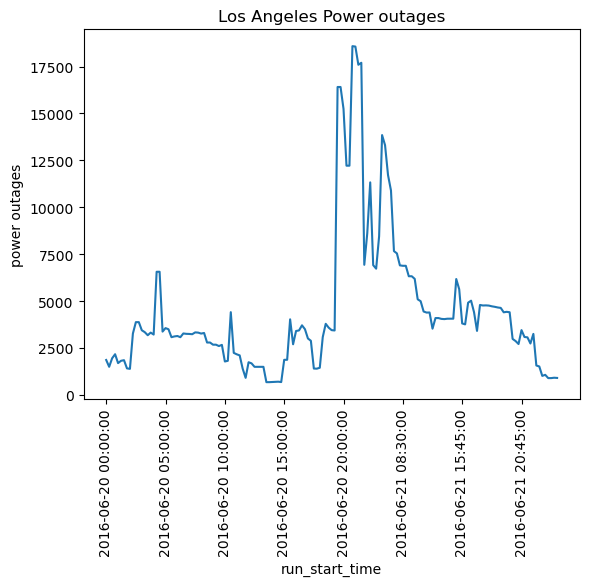

In [47]:
eaglei_outages_20_21_losangeles_df = eaglei_outages_20_21_df.loc[eaglei_outages_df['fips_code'] == 6037]
eaglei_outages_20_21_losangeles_df.plot(x="run_start_time", y="sum", rot=90, title="Los Angeles Power outages", ylabel="power outages", label="LA power outages")

<Axes: title={'center': 'Pima AZ Power outages'}, xlabel='run_start_time', ylabel='power outages'>

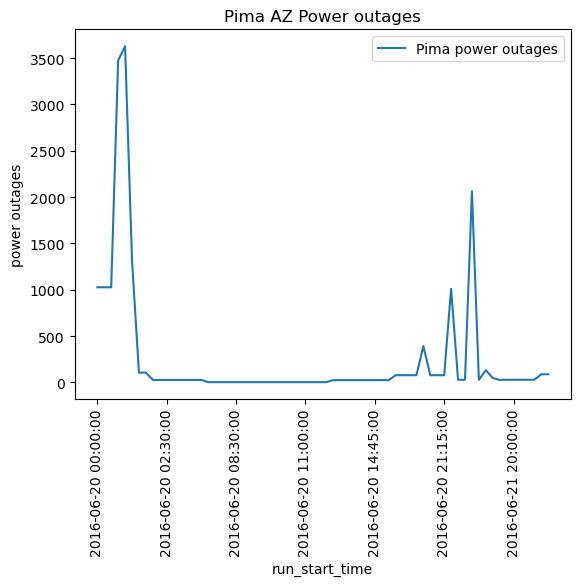

In [51]:
eaglei_outages_20_21_pima_df = eaglei_outages_20_21_df.loc[eaglei_outages_df['fips_code'] == 4019]
eaglei_outages_20_21_pima_df.plot(x="run_start_time", y="sum", rot=90, title="Pima AZ Power outages", ylabel="power outages", label="Pima power outages")

But it would be neat if they could be on the same chart. How do we do that? We can do something like the below

Text(0.5, 1.0, 'Comparing LA and Pima')

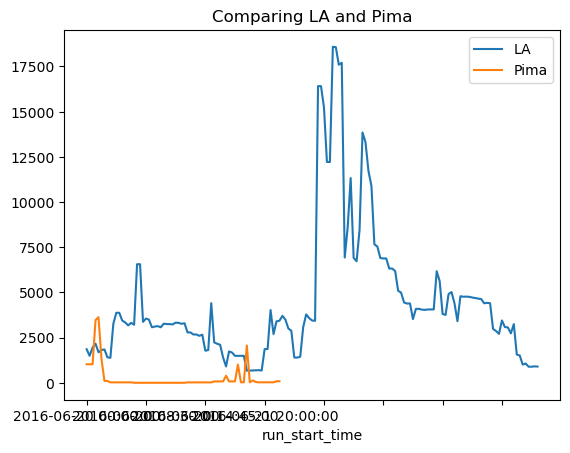

In [50]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
# specifying ax makes sure that the same figure is used for plotting both dataframes
# los angeles data
eaglei_outages_20_21_losangeles_df.plot(ax=ax,x="run_start_time", y="sum", rot=90, label="LA")
# Pima data
eaglei_outages_20_21_pima_df.plot(ax=ax,x="run_start_time", y="sum", rot=90, label="Pima")
plt.title("Comparing LA and Pima")



Well that looks a little weird, doesn't it? What happened? 

Lets investigate the size of the Los Angeles and Pima dataframes

In [44]:
print("rows, columns of the LA dataframe:", eaglei_outages_20_21_losangeles_df.shape)
print("rows, columns of the Pima dataframe:", eaglei_outages_20_21_pima_df.shape)

rows, columns of the LA dataframe: (153, 5)
rows, columns of the Pima dataframe: (66, 5)


as you can see, the LA dataframe has a lot more rows than the Pima dataframe. This could indicate that the Pima dataframe does not have all the timestamps that the LA dataframe has i.e. there is more data collected for the LA dataframe. So we're running into the age old problem in data science: missing data. Always be wary of the fact that your data may not be as complete as you think! 


### Exercise
TODO: what is a good exercise here?